## PS3 Part 2

In [1]:
import pandas as pd
import numpy as np 
import random 
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
%matplotlib inline

from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =boston_housing.load_data()

/Users/ivychen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

#### Model 1

In [3]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [4]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)


processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


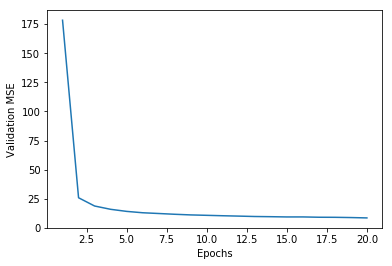

In [5]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

#### add number of epochs

In [6]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


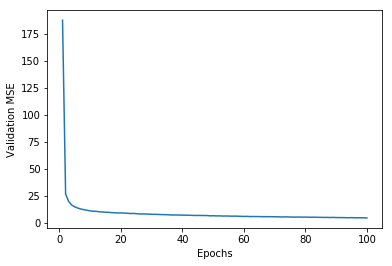

In [7]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

#### Model 2: with dropout

In [8]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [9]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 20
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


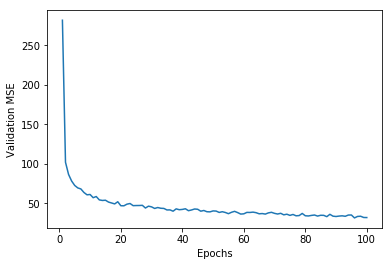

In [10]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [11]:
average_mse_history[-1]

31.92291634845277

#### Model 3: add layers

In [12]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [13]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


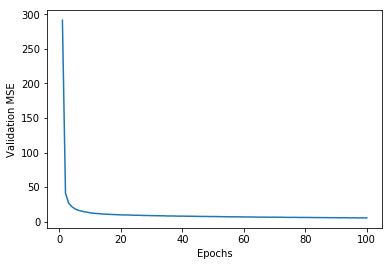

In [14]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [15]:
average_mse_history[-1]

5.4921516806207915

In [16]:
model = build_model()
history = model.fit(train_data, train_targets, epochs=num_epochs, batch_size=1)

Epoch 1/100
404/404 [==============================] - 1s 3ms/step - loss: 318.1209
Epoch 2/100
404/404 [==============================] - 0s 1ms/step - loss: 53.4772
Epoch 3/100
404/404 [==============================] - 0s 1ms/step - loss: 24.4718
Epoch 4/100
404/404 [==============================] - ETA: 0s - loss: 18.33 - 0s 994us/step - loss: 19.5916
Epoch 5/100
404/404 [==============================] - 0s 1ms/step - loss: 17.3904
Epoch 6/100
404/404 [==============================] - 0s 920us/step - loss: 15.7416
Epoch 7/100
404/404 [==============================] - 0s 964us/step - loss: 14.4685
Epoch 8/100
404/404 [==============================] - 0s 916us/step - loss: 13.7952
Epoch 9/100
404/404 [==============================] - 0s 919us/step - loss: 12.6399
Epoch 10/100
404/404 [==============================] - 0s 914us/step - loss: 12.1902
Epoch 11/100
404/404 [==============================] - 0s 912us/step - loss: 11.6834
Epoch 12/100
404/404 [========================

404/404 [==============================] - 0s 1ms/step - loss: 5.3969
Epoch 99/100
404/404 [==============================] - 0s 1ms/step - loss: 4.9456
Epoch 100/100
404/404 [==============================] - ETA: 0s - loss: 5.592 - 0s 1ms/step - loss: 5.3186


In [18]:
test_mse_score = model.evaluate(test_data, test_targets)
test_mse_score

102/102 [==============================] - 0s 3ms/step


15.696518692315793

#### Model 4: add regularizer

In [21]:
from keras import regularizers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001),
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l1(0.001)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse')
    return model

In [22]:
k=10
num_val_samples = len(train_data) // k
num_epochs = 100
all_mse_histories = []
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mse_history = history.history['loss']
    all_mse_histories.append(mse_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
processing fold # 4
processing fold # 5
processing fold # 6
processing fold # 7
processing fold # 8
processing fold # 9


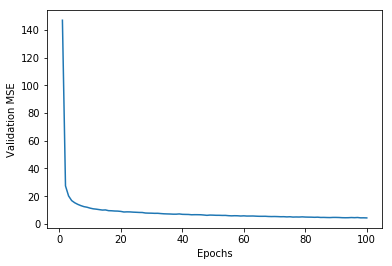

In [23]:
average_mse_history = [
    np.mean([x[i] for x in all_mse_histories]) for i in range(num_epochs)]

plt.plot(range(1, len(average_mse_history) + 1), average_mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MSE')
plt.show()

In [25]:
min(average_mse_history)

4.314700061451276

From the results above, it can be seen that the model with a regularizater and 5 layers will give the minimum MSE.